## Домашнее задание к лекции «Корреляция и корреляционный анализ»

### Задание

Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

#### 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

#### 2. Задача - Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### Решение

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('water.csv')
# Убираю мешающийся столбец, дублирующий индекс
df = df[['location','town','mortality','hardness']]
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


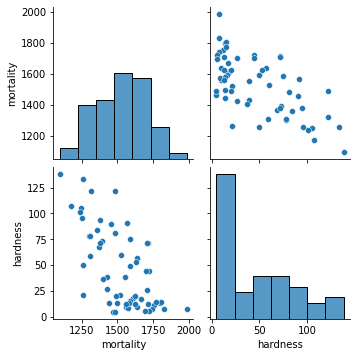

In [26]:
# Смотрим визуально распределение значений между аттрибутами сета
sns.pairplot(df)
# Глазами видим что то похожее на обратную корреляцию в верхнем правом сегменте

In [84]:
# Строим все коэффициенты. Поскольку у нас только 2 атрибута - берем от каждой матрицы (где диагональ = 1) угловое значение.
def_cor = df[['mortality','hardness']].corr().iloc[0,-1]
sp_cor = df[['mortality','hardness']].corr(method='spearman').iloc[0,-1]
k_cor = df[['mortality','hardness']].corr(method='kendall').iloc[0,-1]

print(def_cor, sp_cor, k_cor)

-0.6548486232042464 -0.6316646189166502 -0.45375281767829817


In [78]:
# Построить модель линейной регрессии
X_train, X_test, y_train, y_test = train_test_split( df[['mortality']],  df['hardness'], test_size=0.50, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train)
# Рассчитать коэффициент детерминации
determ_odd = model.score(X_test, y_test)
print(determ_odd)

0.4801032907935383


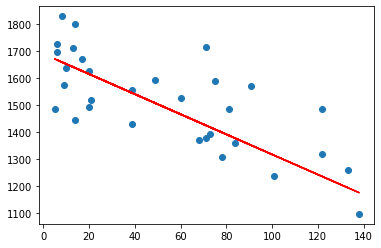

In [58]:
# Вывести график остатков
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [81]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train, X_test, y_train, y_test = train_test_split( df[['mortality']],  df['hardness'], test_size=0.50, random_state=50) 
X_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_const)
results = sm_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     15.86
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           0.000441
Time:                        13:02:28   Log-Likelihood:                -140.15
No. Observations:                  30   AIC:                             284.3
Df Residuals:                      28   BIC:                             287.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.9600     37.807      5.025      0.0

Text(0, 0.5, 'mortality')

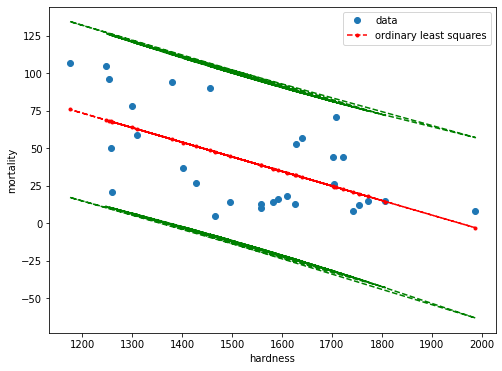

In [86]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="ordinary least squares")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');
ax.set_xlabel('hardness')
ax.set_ylabel('mortality')


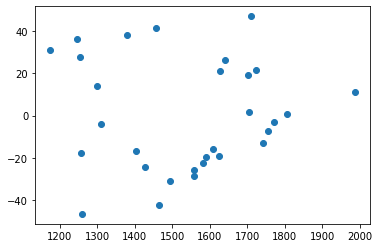

In [87]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([2., 2., 5., 4., 3., 2., 2., 5., 2., 3.]),
 array([-46.58576301, -37.22496652, -27.86417004, -18.50337355,
         -9.14257707,   0.21821942,   9.5790159 ,  18.93981239,
         28.30060887,  37.66140536,  47.02220184]),
 <BarContainer object of 10 artists>)

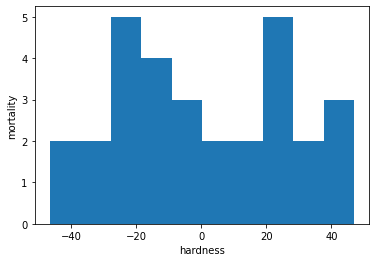

In [85]:
plt.xlabel('hardness')
plt.ylabel('mortality')

plt.hist(results.resid)

### Промежуточный вывод:
Имеется слабая обратная корреляция

In [90]:
# Делим df на части по регионам. Удостоверяемся, что их только 2 :)
df.location.value_counts()
ndf = df[df.location == 'North']
sdf = df[df.location == 'South']

<seaborn.axisgrid.PairGrid object at 0x7f9c733a79b0> <seaborn.axisgrid.PairGrid object at 0x7f9c73753a58>


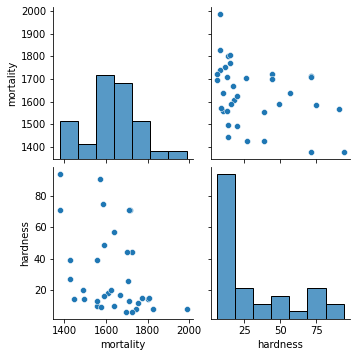

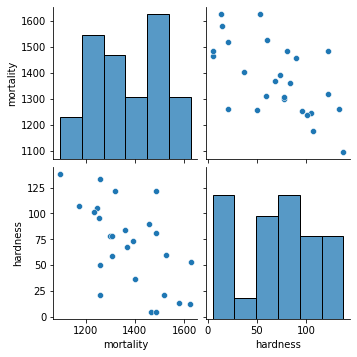

In [95]:
print(sns.pairplot(ndf), sns.pairplot(sdf))

In [96]:
def_cor = ndf[['mortality','hardness']].corr().iloc[0,-1]
sp_cor = ndf[['mortality','hardness']].corr(method='spearman').iloc[0,-1]
k_cor = ndf[['mortality','hardness']].corr(method='kendall').iloc[0,-1]
print('North', def_cor, sp_cor, k_cor)
def_cor = sdf[['mortality','hardness']].corr().iloc[0,-1]
sp_cor = sdf[['mortality','hardness']].corr(method='spearman').iloc[0,-1]
k_cor = sdf[['mortality','hardness']].corr(method='kendall').iloc[0,-1]
print('South', def_cor, sp_cor, k_cor)

North -0.36859783832887183 -0.4042078956511175 -0.2830580977201083
South -0.6021532715484159 -0.5957229185013566 -0.4403148402800253


In [110]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split( ndf[['mortality']],  ndf['hardness'], test_size=0.50, random_state=50)
Xs_train, Xs_test, ys_train, ys_test = train_test_split( sdf[['mortality']],  sdf['hardness'], test_size=0.50, random_state=50)
model = LinearRegression()
nmodel = model.fit(Xn_train, yn_train)
smodel = model.fit(Xs_train, ys_train)
# Рассчитать коэффициент детерминации
determ_odd = model.score(X_test, y_test)
print(f'determ_odd: North - {nmodel.score(Xn_test, yn_test)}, South - {smodel.score(Xs_test, ys_test)}')

determ_odd: North - -15.182786302444747, South - -0.41352488457886993


In [112]:
# Вывести график остатков
nsm_model = sm.OLS(yn_train, sm.add_constant(Xn_train))
ssm_model = sm.OLS(ys_train, sm.add_constant(Xs_train))
nres = nsm_model.fit()
sres = ssm_model.fit()

Text(0, 0.5, 'mortality')

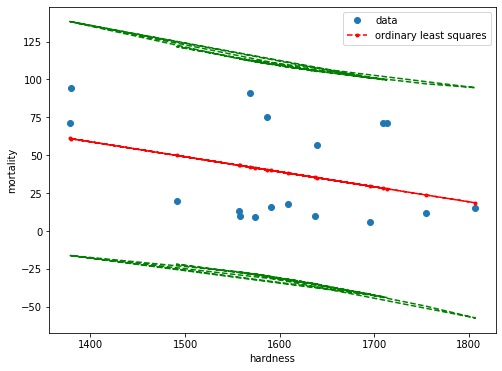

In [117]:
prstd, iv_l, iv_u = wls_prediction_std(nres)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(sm.add_constant(Xn_train).iloc[:, 1], yn_train, 'o', label="data")
ax.plot(sm.add_constant(Xn_train).iloc[:, 1], nres.fittedvalues, 'r--.', label="ordinary least squares")
ax.plot(sm.add_constant(Xn_train).iloc[:, 1], iv_u, 'g--')
ax.plot(sm.add_constant(Xn_train).iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');
ax.set_xlabel('hardness')
ax.set_ylabel('mortality')

Text(0, 0.5, 'mortality')

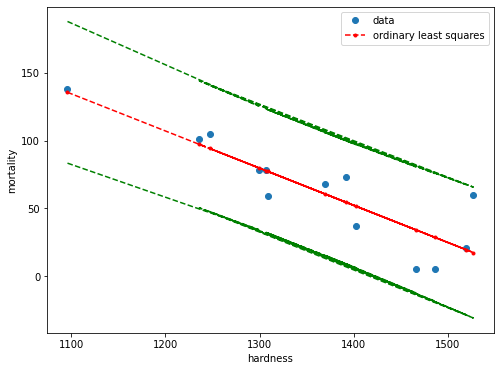

In [118]:
prstd, iv_l, iv_u = wls_prediction_std(sres)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(sm.add_constant(Xs_train).iloc[:, 1], ys_train, 'o', label="data")
ax.plot(sm.add_constant(Xs_train).iloc[:, 1], sres.fittedvalues, 'r--.', label="ordinary least squares")
ax.plot(sm.add_constant(Xs_train).iloc[:, 1], iv_u, 'g--')
ax.plot(sm.add_constant(Xs_train).iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');
ax.set_xlabel('hardness')
ax.set_ylabel('mortality')

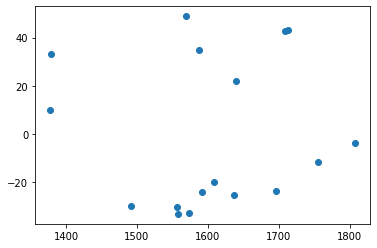

In [120]:
# посмотрим на остатки Севера
plt.scatter(sm.add_constant(Xn_train).iloc[:, 1], nres.resid)

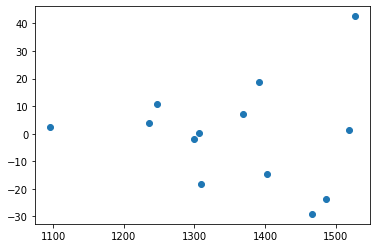

In [121]:
# посмотрим на остатки Юга
plt.scatter(sm.add_constant(Xs_train).iloc[:, 1], sres.resid)

(array([5., 3., 1., 1., 0., 1., 1., 0., 2., 3.]),
 array([-33.21316258, -25.00428019, -16.79539781,  -8.58651543,
         -0.37763305,   7.83124934,  16.04013172,  24.2490141 ,
         32.45789648,  40.66677887,  48.87566125]),
 <BarContainer object of 10 artists>)

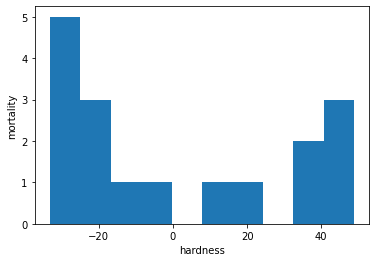

In [128]:
plt.xlabel('hardness')
plt.ylabel('mortality')

plt.hist(nres.resid)

(array([2., 1., 1., 1., 4., 2., 1., 0., 0., 1.]),
 array([-29.10539366, -21.93308983, -14.76078599,  -7.58848215,
         -0.41617832,   6.75612552,  13.92842936,  21.10073319,
         28.27303703,  35.44534087,  42.6176447 ]),
 <BarContainer object of 10 artists>)

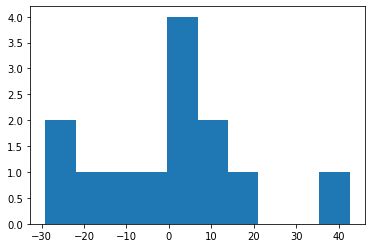

In [129]:
plt.hist(sres.resid)

### Промежуточный вывод
В южном регионе меньше выбросов и сильнее корреляция, чем в северном